# Fake News Project

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Reading and Understanding

In [2]:
# import dataset
df = pd.read_csv("fake_news_train.csv")
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In our label column, 0 means real news and 1 means fake news.

In [3]:
# check shape of the dataset
df.shape

(20800, 6)

In our dataset, 20800 records and 6 features are present.

In [4]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


From the above table, we can see that there is null values present in dataset. So, we nedd to handle or remove them.  

In [5]:
# check counts of null values in dataset
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

we can see that, null values present in three features. maximum null values present in written_by feature.

<AxesSubplot:>

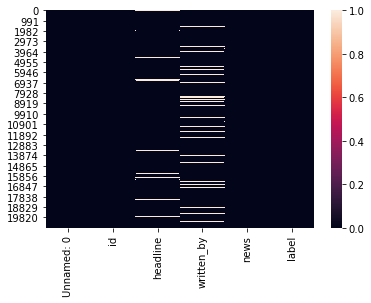

In [6]:
# check null values using heatmap
sns.heatmap(df.isnull())

In [7]:
# check discriptive statistics of the dataset.
df.describe(include='all')

,Unnamed: 0,id,headline,written_by,news,label
count,20800.000000,20800.000000,20242,18843,20761,20800.000000
unique,NaN,NaN,19803,4201,20386,NaN
top,NaN,NaN,The Dark Agenda Behind Globalism And Open Borders,Pam Key,,NaN
freq,NaN,NaN,5,243,75,NaN
mean,10399.500000,10399.500000,NaN,NaN,NaN,0.500625
std,6004.587135,6004.587135,NaN,NaN,NaN,0.500012
min,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,5199.750000,5199.750000,NaN,NaN,NaN,0.000000
50%,10399.500000,10399.500000,NaN,NaN,NaN,1.000000
75%,15599.250000,15599.250000,NaN,NaN,NaN,1.000000


From the above table, we can see that most of the data is unique in headline and news columns.

## Data Cleaning

In [8]:
# drop unnamed:0 column because it is just a index and not useful for our model.
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
# check percentage of missing values 
df.isna().mean().round(4) * 100

id            0.00
headline      2.68
written_by    9.41
news          0.19
label         0.00
dtype: float64

From the above result, we can see that percentage of missing values in not high. So, we can drop missing data. 

In [10]:
# drop missing data
df = df.dropna()

## Data Analysis

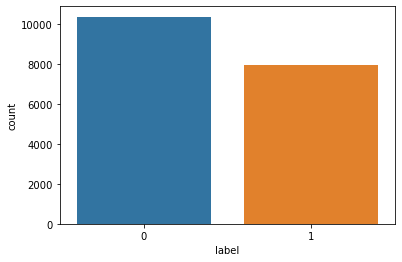

0    10361
1     7924
Name: label, dtype: int64

In [11]:
sns.countplot(df['label'])
plt.show()

df['label'].value_counts()

From the above count plot we can see that, there is not much difference between label 0 (Real news) and label 1 (Fake news). So, there is no need to balance the data.

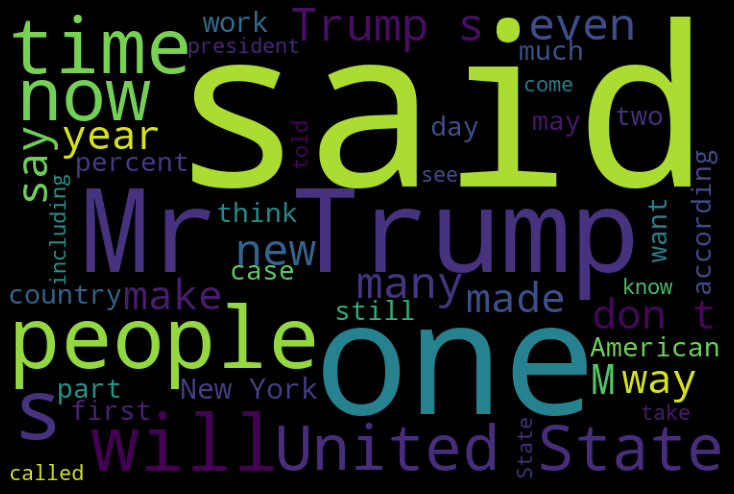

In [12]:
# Now, we plot wordcloud of real news and see which type word is most used in real news.
from wordcloud import WordCloud
hams = df['news'][df['label']==0]
spam_cloud = WordCloud(width=750,height=500,background_color='black',max_words=45).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

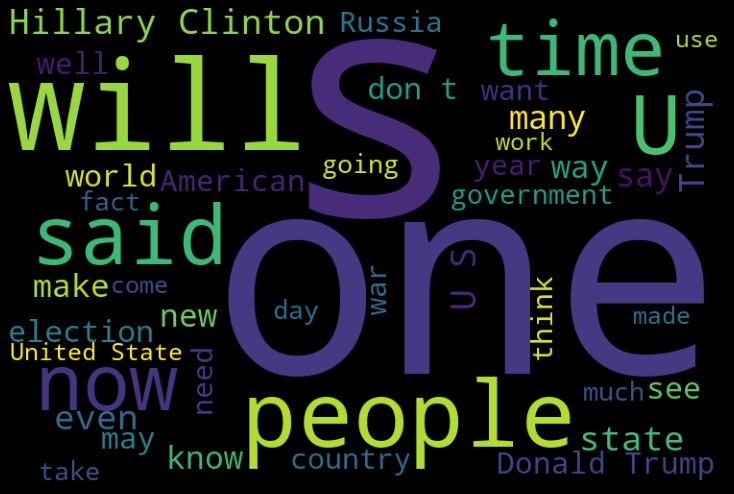

In [13]:
# Now, we plot wordcloud of fake news and see which type word is most used in fake news.
from wordcloud import WordCloud
hams = df['news'][df['label']==1]
spam_cloud = WordCloud(width=750,height=500,background_color='black',max_words=45).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Data Preparation and Cleaning

In [14]:
# import useful libraries
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# calculating news length
df["news_length"] = df["news"].str.len()

In [16]:
# Convert all news text into lower case
df['cleaned_news_text'] = df['news'].str.lower()

In [17]:
# remove punctuation from cleaned news text column
df['cleaned_news_text'] = df['cleaned_news_text'].str.replace('[^\w\s]','')

In [18]:
# removing stopwords from cleaned news text column
df['cleaned_news_text'] = df['cleaned_news_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,id,headline,written_by,news,label,news_length,cleaned_news_text
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936,washington sonny perdues telling georgians gro...
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112,houston venezuela plan tactical approach desig...
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425,sunday abcs week discussing republican plan re...
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516,augusta beleaguered republican governor maine ...
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164,finian cunningham written extensively internat...


In [19]:
# Here, we use Lemmatizing. Lemmatization is the process of converting a word to its base form.
df['cleaned_news_text'] = df['cleaned_news_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(x) for x in x.split()))
df.head()

,id,headline,written_by,news,label,news_length,cleaned_news_text
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936,washington sonny perdues telling georgian grow...
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112,houston venezuela plan tactical approach desig...
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425,sunday abc week discussing republican plan rep...
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516,augusta beleaguered republican governor maine ...
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164,finian cunningham written extensively internat...


In [20]:
# calculating cleaned news length
df["cleaned_news_length"] = df["cleaned_news_text"].str.len()
df.head()

,id,headline,written_by,news,label,news_length,cleaned_news_text,cleaned_news_length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936,washington sonny perdues telling georgian grow...,5372
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112,houston venezuela plan tactical approach desig...,4074
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425,sunday abc week discussing republican plan rep...,266
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516,augusta beleaguered republican governor maine ...,4377
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164,finian cunningham written extensively internat...,6572


In [21]:
# total reduced length
print("Original Length: ",df['news_length'].sum())
print("Cleaned Length: ",df['cleaned_news_length'].sum())

Original Length:  87771325
Cleaned Length:  59538463


In [22]:
# Most frequent words counter
import nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

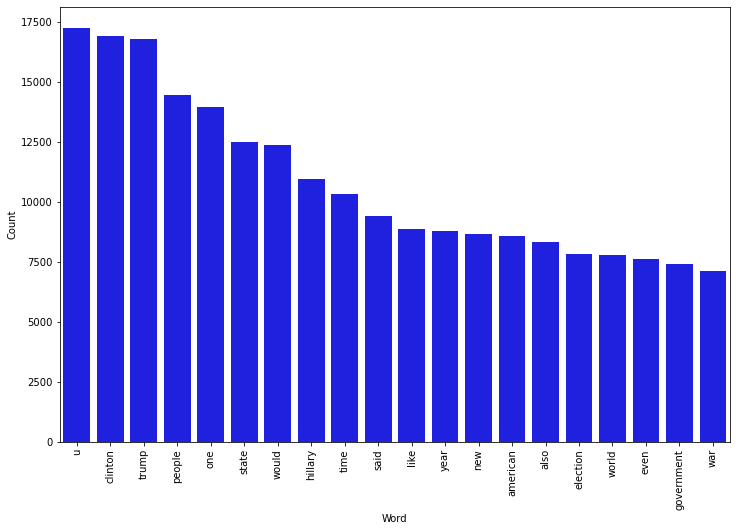

In [23]:
# Most frequent 20 words in fake news
counter(df[df["label"] == 1], "cleaned_news_text", 20)

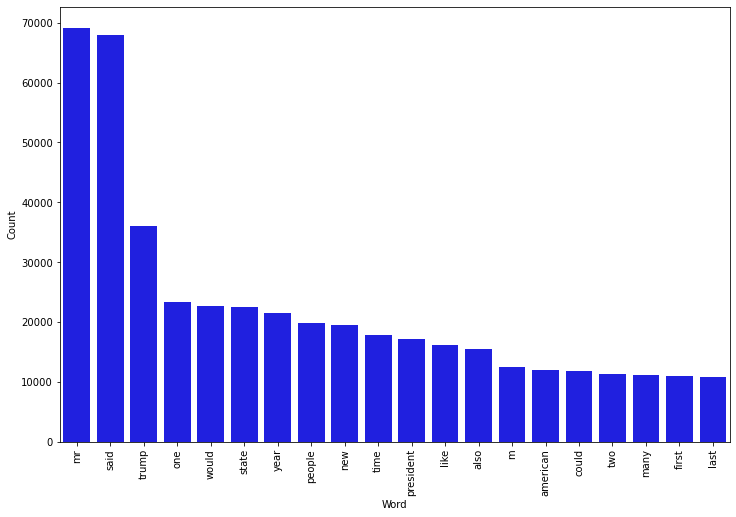

In [24]:
# Most frequent 20 words in real news
counter(df[df["label"] == 0], "cleaned_news_text", 20)

In [25]:
# convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(stop_words='english')
feature = tf_vec.fit_transform(df['cleaned_news_text'])

# split the target column.
# here, our target column is label and it is a classification problem.
x = feature
y = df['label']

In [26]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

## Find Best Model using TF-IDF

In [27]:
# our problem is classification type of problem.
# import useful libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predm))
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("************************************************************")
    print("\n")

Accuracy of LogisticRegression() is:
Accuracy of training model is: 0.9748427672955975
Accuracy Score: 0.9439431227782336
Confusion matrix: 
 [[1977  101]
 [ 104 1475]]
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2078
           1       0.94      0.93      0.94      1579

    accuracy                           0.94      3657
   macro avg       0.94      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657

************************************************************


Accuracy of DecisionTreeClassifier() is:
Accuracy of training model is: 0.9999316379546076
Accuracy Score: 0.8958162428219852
Confusion matrix: 
 [[1876  202]
 [ 179 1400]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      2078
           1       0.87      0.89      0.88      1579

    accuracy                           0.90      3657


### Bagging and Boosting methods

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
train = rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Model training accuracy:",train)
print("Accuracy Score:",accuracy_score(y_test,pred_rf))
print("Confusion matrix:","\n",confusion_matrix(y_test,pred_rf))
print("Classification report:","\n",classification_report(y_test,pred_rf))

Model training accuracy: 0.9999316379546076
Accuracy Score: 0.9051134809953514
Confusion matrix: 
 [[2025   53]
 [ 294 1285]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2078
           1       0.96      0.81      0.88      1579

    accuracy                           0.91      3657
   macro avg       0.92      0.89      0.90      3657
weighted avg       0.91      0.91      0.90      3657



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
train = gbc.score(x_train,y_train)
predgbc = gbc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predgbc))
print("Confusion matrix:","\n",confusion_matrix(y_test,predgbc))
print("Classification report:","\n",classification_report(y_test,predgbc))

Accuracy of training model is: 0.9397046759639048
Accuracy Score: 0.932184850970741
Confusion matrix: 
 [[1934  144]
 [ 104 1475]]
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2078
           1       0.91      0.93      0.92      1579

    accuracy                           0.93      3657
   macro avg       0.93      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657



In [30]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
train = xg.score(x_train,y_train)
predxg = xg.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predxg))
print("Confusion matrix:","\n",confusion_matrix(y_test,predxg))
print("Classification report:","\n",classification_report(y_test,predxg))

[18:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of training model is: 0.9980175006836205
Accuracy Score: 0.9633579436696746
Confusion matrix: 
 [[2008   70]
 [  64 1515]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2078
           1       0.96      0.96      0.96      1579

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



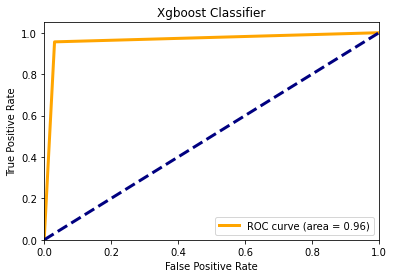

In [32]:
# check auc curve and auc_roc score of best model
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(predxg,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="orange", lw=3, label=("ROC curve (area = %0.2f)" % roc_auc))
plt.plot([0,1],[0,1],color = "navy",lw=3,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Xgboost Classifier")
plt.legend(loc = "lower right")
plt.show()

## Find Best Model using CountVectorizer

In [33]:
# convert text into vectors using CountVectorizer
count_vec = CountVectorizer(stop_words='english')
feature_count = count_vec.fit_transform(df['cleaned_news_text'])

# split the target column.
# here, our target column is label and it is a classification problem.
x_count = feature_count
y_count = df['label']

In [34]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_count,y_count,test_size=0.20,random_state=0)

In [35]:
models = [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB()]

for i in model:
    i.fit(x_train,y_train)
    train = i.score(x_train,y_train)
    predi = i.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predi))
    print("Confusion matrix:","\n",confusion_matrix(y_test,predi))
    print("Classification report:","\n",classification_report(y_test,predi))
    print("************************************************************")
    print("\n")

Accuracy of MultinomialNB() is:
Accuracy of training model is: 0.9999316379546076
Accuracy Score: 0.954334153677878
Confusion matrix: 
 [[1989   89]
 [  78 1501]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2078
           1       0.94      0.95      0.95      1579

    accuracy                           0.95      3657
   macro avg       0.95      0.95      0.95      3657
weighted avg       0.95      0.95      0.95      3657

************************************************************


Accuracy of MultinomialNB() is:
Accuracy of training model is: 0.9999316379546076
Accuracy Score: 0.8988241728192508
Confusion matrix: 
 [[1898  180]
 [ 190 1389]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2078
           1       0.89      0.88      0.88      1579

    accuracy                           0.90      3657
   macro avg   

### Bagging and Boosting methods

In [36]:
rf_count = RandomForestClassifier()
rf_count.fit(x_train,y_train)
train = rf_count.score(x_train,y_train)
pred_rf_count=rf_count.predict(x_test)
print("Model training accuracy:",train)
print("Accuracy Score:",accuracy_score(y_test,pred_rf_count))
print("Confusion matrix:","\n",confusion_matrix(y_test,pred_rf_count))
print("Classification report:","\n",classification_report(y_test,pred_rf_count))

Model training accuracy: 0.9999316379546076
Accuracy Score: 0.8988241728192508
Confusion matrix: 
 [[2029   49]
 [ 321 1258]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2078
           1       0.96      0.80      0.87      1579

    accuracy                           0.90      3657
   macro avg       0.91      0.89      0.89      3657
weighted avg       0.91      0.90      0.90      3657



In [37]:
gbc_count = GradientBoostingClassifier()
gbc_count.fit(x_train,y_train)
train = gbc_count.score(x_train,y_train)
predgbc_count = gbc_count.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predgbc_count))
print("Confusion matrix:","\n",confusion_matrix(y_test,predgbc_count))
print("Classification report:","\n",classification_report(y_test,predgbc_count))

Accuracy of training model is: 0.9371752802843861
Accuracy Score: 0.9340989882417282
Confusion matrix: 
 [[1932  146]
 [  95 1484]]
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2078
           1       0.91      0.94      0.92      1579

    accuracy                           0.93      3657
   macro avg       0.93      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657



In [38]:
xg_count = XGBClassifier()
xg_count.fit(x_train,y_train)
train = xg_count.score(x_train,y_train)
predxg_count = xg_count.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predxg_count))
print("Confusion matrix:","\n",confusion_matrix(y_test,predxg_count))
print("Classification report:","\n",classification_report(y_test,predxg_count))

[18:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of training model is: 0.9956931911402789
Accuracy Score: 0.9622641509433962
Confusion matrix: 
 [[2003   75]
 [  63 1516]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2078
           1       0.95      0.96      0.96      1579

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



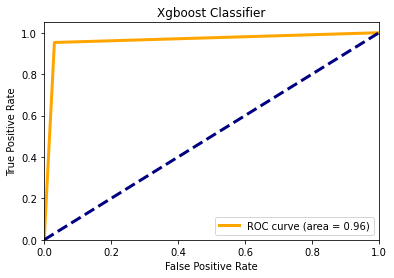

In [39]:
# check auc_roc curve and auc score of best model
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(predxg_count,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="orange", lw=3, label=("ROC curve (area = %0.2f)" % roc_auc))
plt.plot([0,1],[0,1],color = "navy",lw=3,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Xgboost Classifier")
plt.legend(loc = "lower right")
plt.show()

1. First We use some algorithms with tf-idf and countvectorizer.


2. We find xgboost classifier with tf-idf as best model. It gives 99% training model accuracy and 96% testing accuracy. xgboost classifier gives good precision and recall score along with f1 score. It also gives good auc score and confirm that our model is not going through underfitting and overfitting.


3. Here, we don't use hyperparameter tuning because it takes too much time as well as some algorithm also gives memory error.

In [40]:
#save best result
df1 = pd.DataFrame(predxg)
df1.to_csv("xg_fakenews.csv")
#save best model
import joblib
joblib.dump(xg,"xg_fakenews.obj")

['xg_fakenews.obj']